# LMP Point-by-Point Analysis

The notebook takes the tabulated results of the point by point market problem, and creates some summary information and plots.

In [1]:
import os

from util.surrogate import SurrogateProcessModels
from util.data import get_model_data, DataObject
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA

In [2]:
data = DataObject()
surrogate = SurrogateProcessModels()
surrogate.generate_surrogate_models()
model_data = get_model_data()

In [3]:
def profit_hist(dat, range=(None, None), nbins=20):
    if range[0] is None:
        range = (min(dat/1000), range[1])
    if range[1] is None:
        range = (range[0], max(dat/1000))
    plt.hist(dat/1000, nbins, weights=np.ones(len(dat)) / len(dat), range=range)
    plt.xlabel("Net profit ($1000/hr)")
    plt.ylabel("Portion of time in bin")
    plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
    plt.show()
    
def power_hist(dat, range=(None, None), nbins=20):
    if range[0] is None:
        range = (min(dat), range[1])
    if range[1] is None:
        range = (range[0], max(dat))
    plt.hist(dat, nbins, weights=np.ones(len(dat)) / len(dat), range=range)
    plt.xlabel("Net Power (MW)")
    plt.ylabel("Portion of time in bin")
    plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
    plt.show()

def h2_hist(dat, range=(None, None), nbins=20):
    if range[0] is None:
        range = (min(dat), range[1])
    if range[1] is None:
        range = (range[0], max(dat))
    plt.hist(dat, 20, weights=np.ones(len(dat)) / len(dat), range=range)
    plt.xlabel("Hydrogen Production (kg/hr)")
    plt.ylabel("Portion of time in bin")
    plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
    plt.show()
    
def lmp_hist(dat, range=(None, None), nbins=20):
    if range[0] is None:
        range = (min(dat), range[1])
    if range[1] is None:
        range = (range[0], max(dat))
    plt.hist(dat, 20, weights=np.ones(len(dat)) / len(dat), range=range)
    plt.xlabel("LMP ($/MWh)")
    plt.ylabel("Portion of time in bin")
    plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
    plt.show()  

In [4]:
model = "model3"
data_set = "CAISO_100"
result_dir = "../lmp_point_by_point"

In [5]:
result_file = os.path.join(result_dir, f"{data_set}_{model}.csv")
df = pd.read_csv(result_file)

In [6]:
n = len(df["profit ($/hr)"])
profit = sum(df["profit ($/hr)"])/n*365*24/1e6
total_power = sum(df["net_power (MW)"])/n*365*24/1e6
total_h2 = sum(df["h_prod (kg/s)"])/n*365*24/1e6*3600
pct_time_off = sum(df["mode_off"])/n * 100
pct_time_power_only = sum(df["mode_power_only"])/n * 100
pct_time_hydrogen = sum(df["mode_hydrogen"])/n * 100
pct_time_hydrogen_only = sum(df["mode_hydrogen_only"])/n * 100

print(f"Model: {model}")
print(f"LMP Data: {data_set}")
print(f"Annual Profit = {profit} Million $/yr)")
print(f"Annual Power = {total_power} Million MWh")
print(f"Annual Hydrogen = {total_h2} Million kg")
print(f"Time power only = {pct_time_power_only}%")
print(f"Time hydrogen/power = {pct_time_hydrogen}%")
print(f"Time hydrogen only = {pct_time_hydrogen_only}%")
print(f"Time off = {pct_time_off}%")

Model: model3
LMP Data: CAISO_100
Annual Profit = -9.809499244714798 Million $/yr)
Annual Power = 3.19734526403978 Million MWh
Annual Hydrogen = 63.5575719387413 Million kg
Time power only = 59.60393772893773%
Time hydrogen/power = 40.39606227106227%
Time hydrogen only = 0.0%
Time off = 0.0%


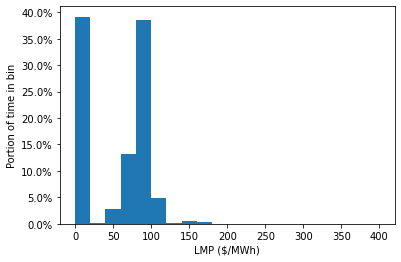

LMP range ($/MWh): 0.0 to 178.28


In [7]:
lmp_hist(df["lmp ($/MWh)"], range=(None, 400))
print(f'LMP range ($/MWh): {min(df["lmp ($/MWh)"])} to {max(df["lmp ($/MWh)"])}')

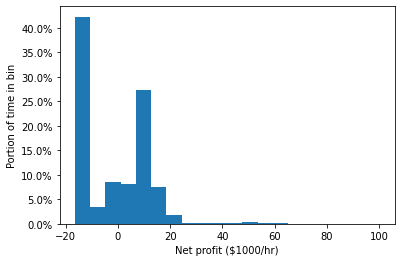

Profit range ($1000/hr): -16.38420317355717 to 66.36936578035477


In [8]:
profit_hist(df["profit ($/hr)"], range=(None, 100))
print(f'Profit range ($1000/hr): {min(df["profit ($/hr)"])/1000} to {max(df["profit ($/hr)"])/1000}')

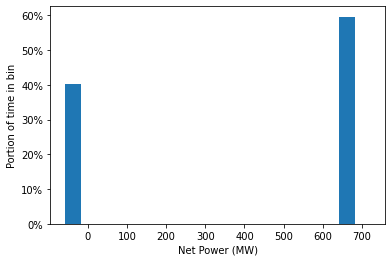

In [9]:
power_hist(df["net_power (MW)"], range=(None, 720))

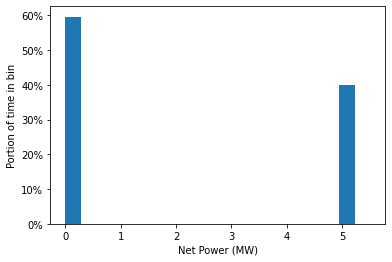

In [10]:
power_hist(df["h_prod (kg/s)"], range=(None, 5.5))

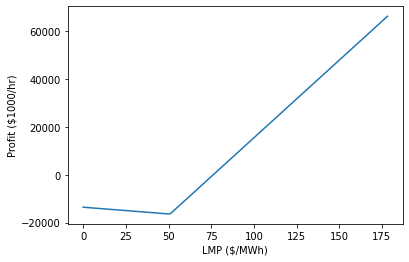

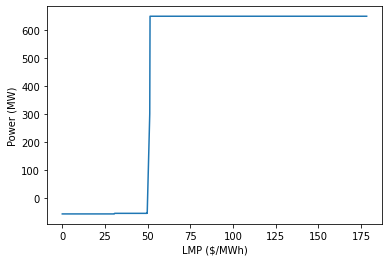

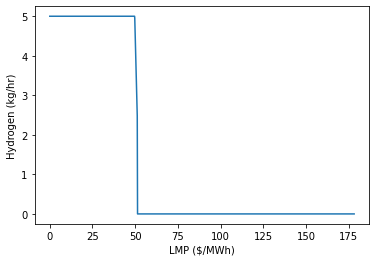

In [11]:
dat = sorted(zip(df["lmp ($/MWh)"], df["profit ($/hr)"]), key=lambda x:x[0])
plt.plot([x[0] for x in dat], [x[1] for x in dat])
plt.xlabel("LMP ($/MWh)")
plt.ylabel("Profit ($1000/hr)")
plt.show()

dat = sorted(zip(df["lmp ($/MWh)"], df["net_power (MW)"]), key=lambda x:x[0])
plt.plot([x[0] for x in dat], [x[1] for x in dat])
plt.xlabel("LMP ($/MWh)")
plt.ylabel("Power (MW)")
plt.show()

dat = sorted(zip(df["lmp ($/MWh)"], df["h_prod (kg/s)"]), key=lambda x:x[0])
plt.plot([x[0] for x in dat], [x[1] for x in dat])
plt.xlabel("LMP ($/MWh)")
plt.ylabel("Hydrogen (kg/hr)")
plt.show()

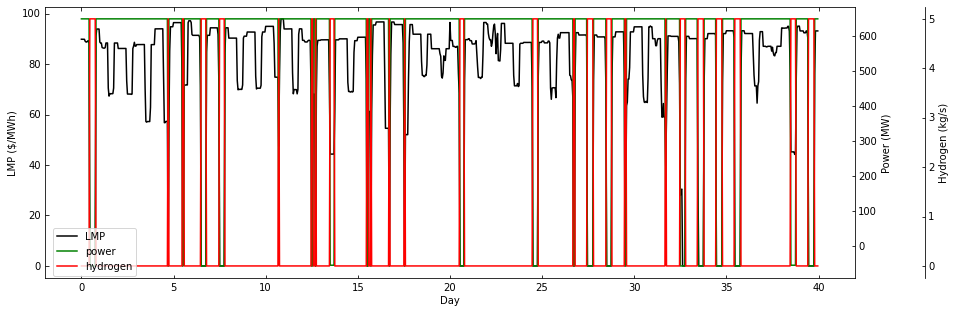

In [12]:
fig = plt.figure(figsize=(18,5))
ax1 = host_subplot(111, axes_class=AA.Axes)
ax1.set_ylabel("LMP ($/MWh)")
plt.subplots_adjust(right=0.75)
ax2 = ax1.twinx()
ax3 = ax1.twinx()
ax2.axis["right"] = ax3.get_grid_helper().new_fixed_axis(loc="right", axes=ax2,offset=(0, 0))
ax2.set_ylabel("Power (MW)")
ax3.axis["right"] = ax3.get_grid_helper().new_fixed_axis(loc="right", axes=ax3,offset=(70, 0))
ax3.set_ylabel("Hydrogen (kg/s)")
ax3.set_ylim(-0.25, 5.25)

days = 40
day1 = 0

s1 = ax1.plot([i/24 for i in range(days*24)], df["lmp ($/MWh)"][day1*24:days*24 + day1*24], label="LMP", color="black")
s2 = ax2.plot([i/24 for i in range(days*24)], df["net_power (MW)"][day1*24:days*24+day1*24], label="power", color="g")
s3 = ax3.plot([i/24 for i in range(days*24)], df["h_prod (kg/s)"][day1*24:days*24+day1*24], label="power", color="r")
plt.xlabel("Day")
s = s1 + s2 + s3
ax1.legend(s, ["LMP", "power", "hydrogen"], loc=(0.01, 0.01))
plt.show()